# Titanic - EDA


## Introduction

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

> This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition homepage: https://www.kaggle.com/competitions/titanic

#### The ultimate goal: 
- Understand the dataset
- Create a model that could achieve Kaggle score of 0.8

**Evaluation metric**: Accuracy rate.

#### Hypothesis:
I believe that the two main information that affect greatly on survival probability is passenger's **gender** and **age**.

## Preparation

### Import necessary libraries

In [1]:
# turn off warning
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load train.csv file

In [2]:
path_dir = os.path.join("..", "..", "data", "raw")
titanic = pd.read_csv(os.path.join(path_dir, "train.csv"))
df = titanic.copy()
test_dataset = pd.read_csv(os.path.join(path_dir, "test.csv"))
df_test = test_dataset.copy()
print("Successfully load training data.")

Successfully load training data.


## Have a look at the dataset

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Base on the output, we could say that there are 891 rows and  12 variables inside the train dataset:
- **Survived**: Survival (0 = No, 1 = Yes)
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Sex: Sex (male/female)
- Age: Age in years	
- Sibsp: # of siblings / spouses aboard the Titanic	
- Parch: # of parents / children aboard the Titanic	
- Ticket: Ticket number	
- Fare: Passenger fare	
- Cabin: Cabin number	
- Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)

For the test dataset, there are 418 rows and 11 variables (without `Survived` variable).

Base on the `df.info()`, we could say there are 7 numeric variables and 5 object variables, with `Survived` being the outcome of the model. We might have to transform these object variables in a way that model can understand itself.

We can see that `Age`, `Cabin` and `Embarked` in train dataset and `Age`, `Cabin` and `Fare` in test dataset have missing values, we will explore number of missing value and it's proportion.

Look at the features information, there are four categorical variables, we will convert it into `category` type to implement analysis better.

In [5]:
for x in ['Pclass', 'Sex', 'Embarked']:
    df[x] = df[x].astype('category')
    df_test[x] = df_test[x].astype('category')
df['Survived'] = df['Survived'].astype('category')

In [6]:
print("===== Number of missing values (train dataset) =====\n")
print(df[['Age', 'Cabin', 'Embarked']].isnull().sum())
print('\n')
print("===== Number of missing values (test dataset) =====\n")
print(df_test[['Age', 'Cabin', 'Fare']].isnull().sum())

===== Number of missing values (train dataset) =====

Age         177
Cabin       687
Embarked      2
dtype: int64


===== Number of missing values (test dataset) =====

Age       86
Cabin    327
Fare       1
dtype: int64


In [7]:
print("===== Percentage of missing values on train dataset =====\n")
print(df[['Age', 'Cabin', 'Embarked']].isnull().sum() / len(df) * 100)
print('\n')
print("===== Percentage of missing values on test dataset =====\n")
print(df_test[['Age', 'Cabin', 'Fare']].isnull().sum() / len(df_test) * 100)

===== Percentage of missing values on train dataset =====

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


===== Percentage of missing values on test dataset =====

Age      20.574163
Cabin    78.229665
Fare      0.239234
dtype: float64


The `Cabin` has lots of missing data, so we might need to find a way to handle it later.

We should also check if any rows inside the dataset duplicate each other in order to deal with it as these could affect negatively on training length.

In [8]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


There are no duplicate rows in the dataset, which is good.

We want to check it's uniqueness of each column.

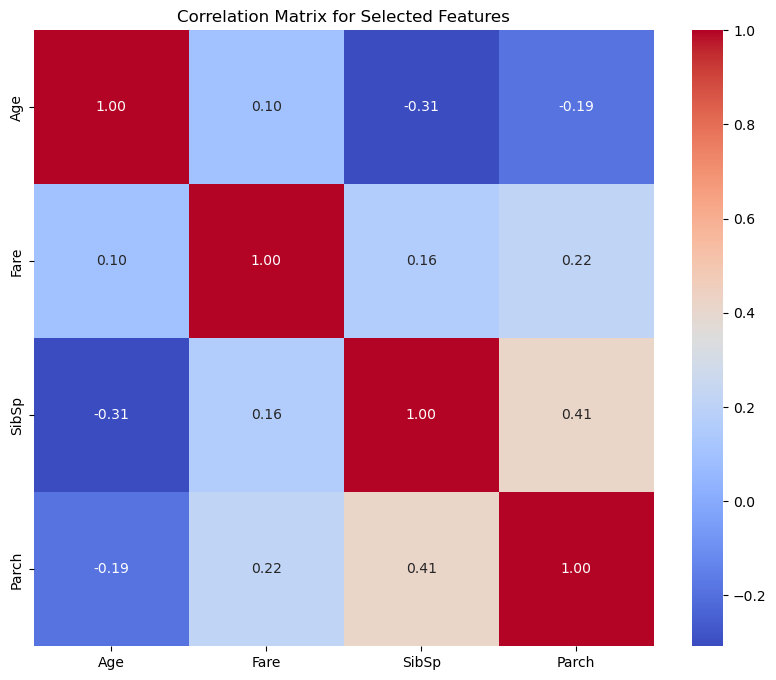

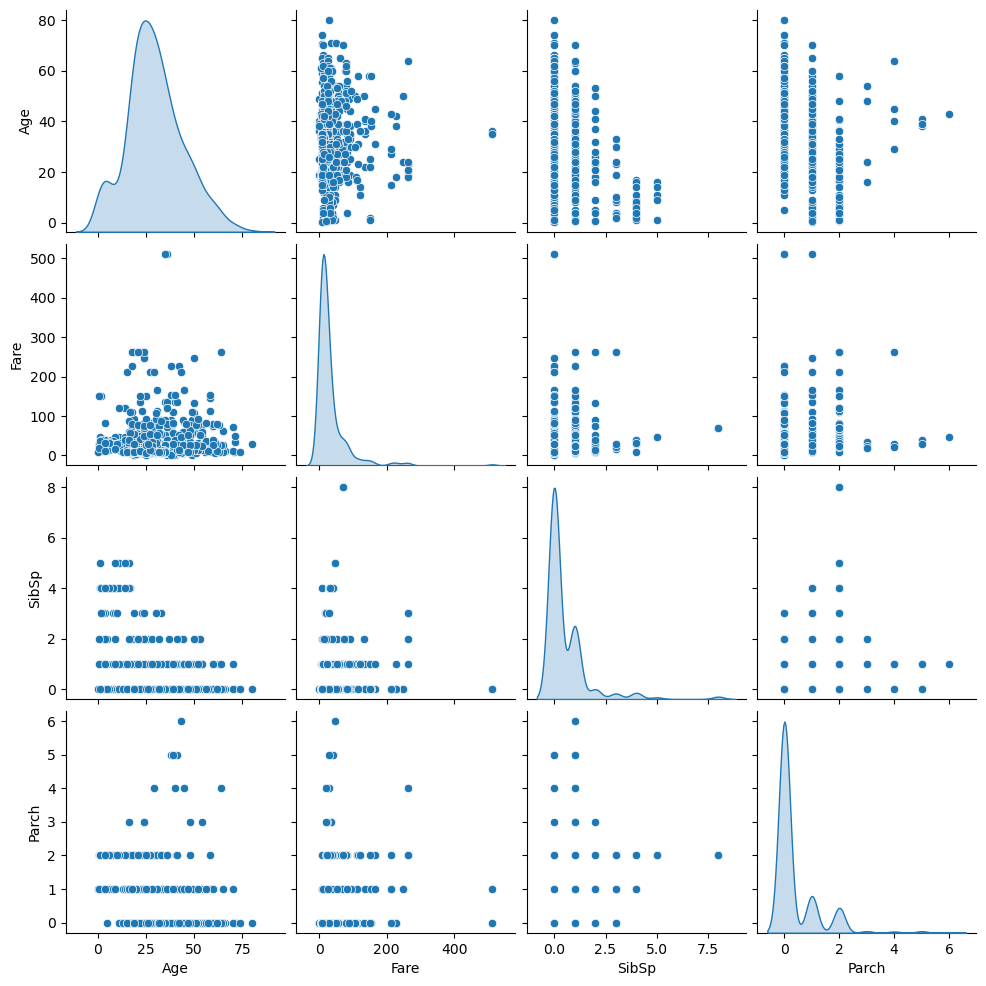

In [9]:
selected_columns = ['Age', 'Fare', 'SibSp', 'Parch'] 

plt.figure(figsize=(10,8))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Selected Features")
plt.show()

sns.pairplot(df[selected_columns], diag_kind="kde")
plt.show()

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

From the result, we could see that some features do have lots of unique values, but some features (`Survived`, `Pclass`, `Sex`, `Embarked`) only have 2 - 3 different values, as it is categorical (we don't count `SibSp`, `Parch` here because it makes sense).

## EDA Analysis

EDA Analysis is a very important part in order to understand the dataset. Throughout the analysis we could understand the pattern between variables, it's distribution, skewness,... From that, we can come up with solution to enhance accuracy of the model.

### Univariate Analysis for Numeric data

#### Descriptive statistics

In [11]:
df.describe().apply(lambda x: x.apply('{: .2f}'.format))

,PassengerId,Age,SibSp,Parch,Fare
count,891.00,714.00,891.00,891.00,891.00
mean,446.00,29.70,0.52,0.38,32.20
std,257.35,14.53,1.10,0.81,49.69
min,1.00,0.42,0.00,0.00,0.00
25%,223.50,20.12,0.00,0.00,7.91
50%,446.00,28.00,0.00,0.00,14.45
75%,668.50,38.00,1.00,0.00,31.00
max,891.00,80.00,8.00,6.00,512.33


From the output, we could see there are lots of figures generated:

- **Count**: Shows the number of non-null values in each column.
- **Mean**: Indicates the average value for each numerical column.
- **Std**: The standard deviation, representing how spread out the values are from the mean.
- **Min** & **Max**: Show the minimum and maximum values, thus giving the range of the data (range = max - min).
- **25%** (Q1), **50%** (Median), **75%** (Q3): These are the quartiles. The 50% is the median. These give insights into how the data is distributed (e.g. symmetric, skewed).

Distribution/Spread: If the mean and median (50%) are close, the distribution is fairly symmetric; if not, the data may be skewed.

The skewness of variable's distribution
- PassengerId: Not skewed (mean = median)
- Age: Not skewed (mean nearly equals median)
- SibSp: Unsure (mean nearly equals median, but the min and max value are too separate)
- Parch: Unsure (mean nearly equals median, but the min and max value are too separate)
- Fare: Skewed (mean = 32.20, while median = 14.45)

#### Check duplicate values

In [12]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


#### Density plot

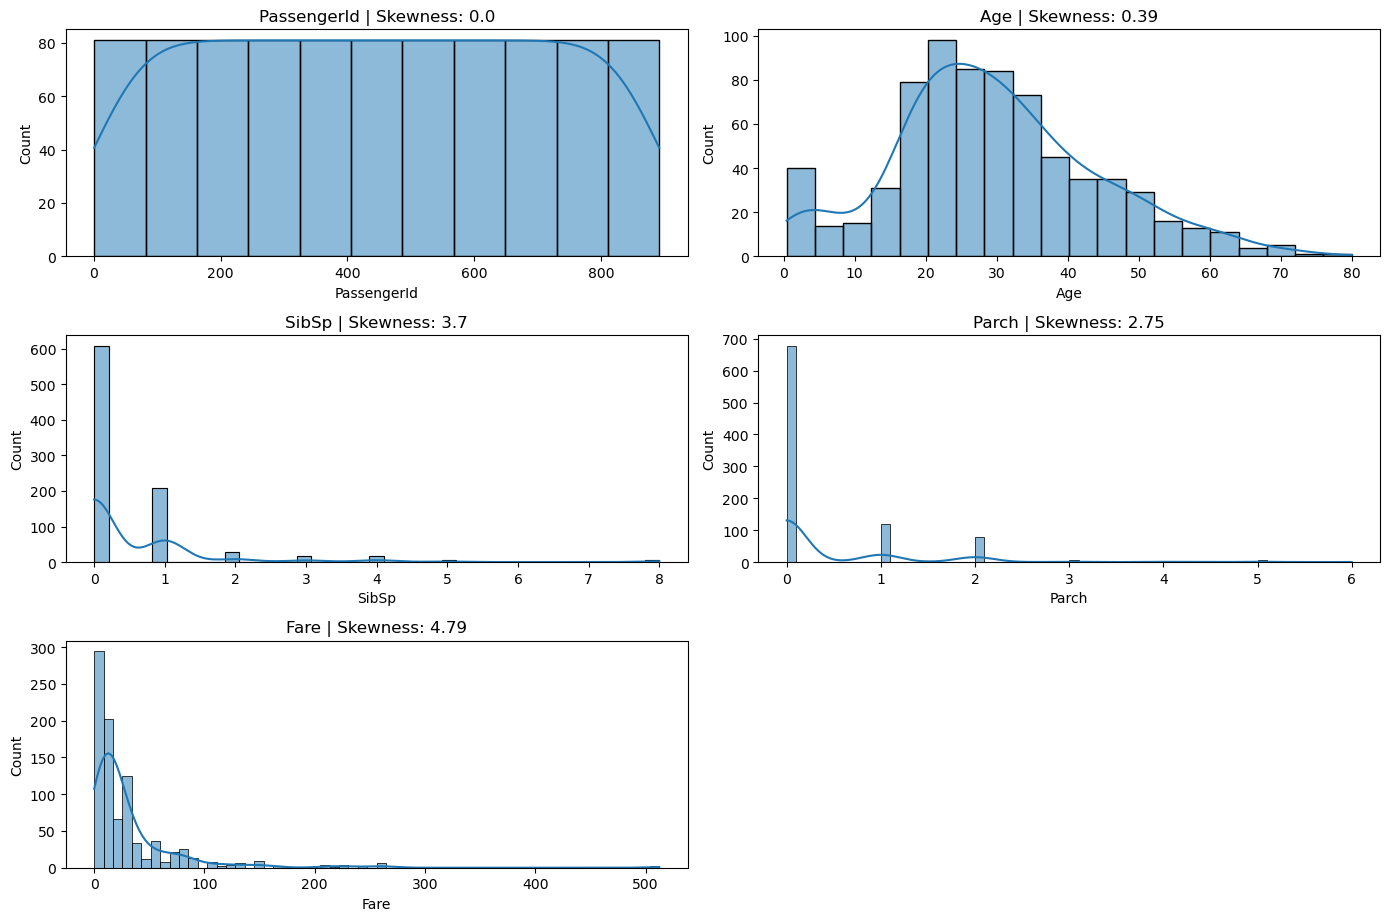

In [13]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

#### Boxplot

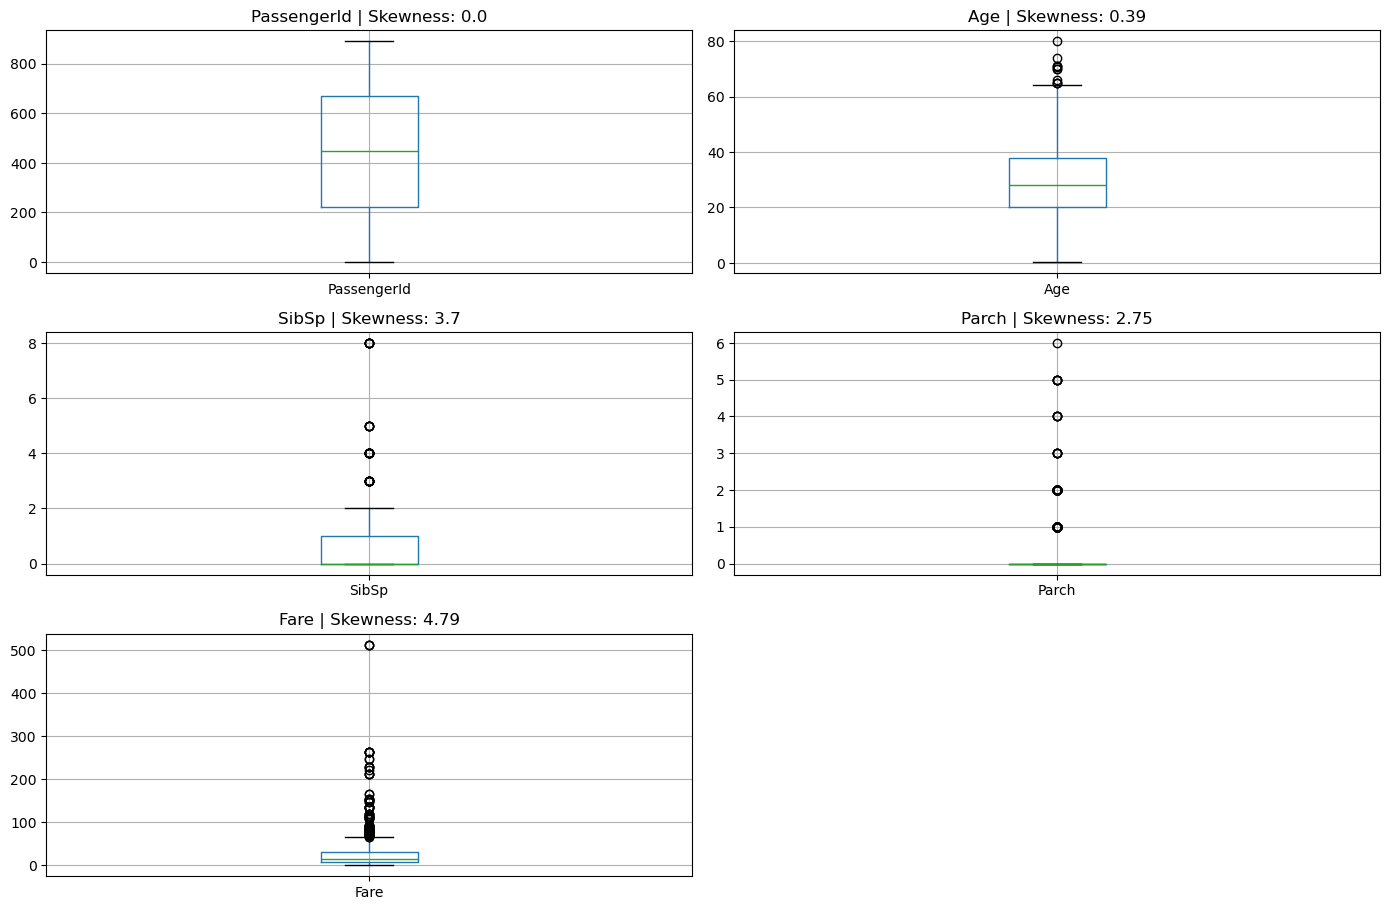

In [14]:
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    df.boxplot(column=feature)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

#### Comment

As we can see from the Density plot and Boxplot, clearly `SibSp`, `Parch`, and `Fare` have very high skewness. Moreover, four out of five variables have outlier values. Although some of the outliers are quite necessary (SibSp and Parch), the graph suggests that we should do something to handle that problem.

### Univariate Analysis for Categorical variables

#### Countplot

Let start by showing distribution of these variables.

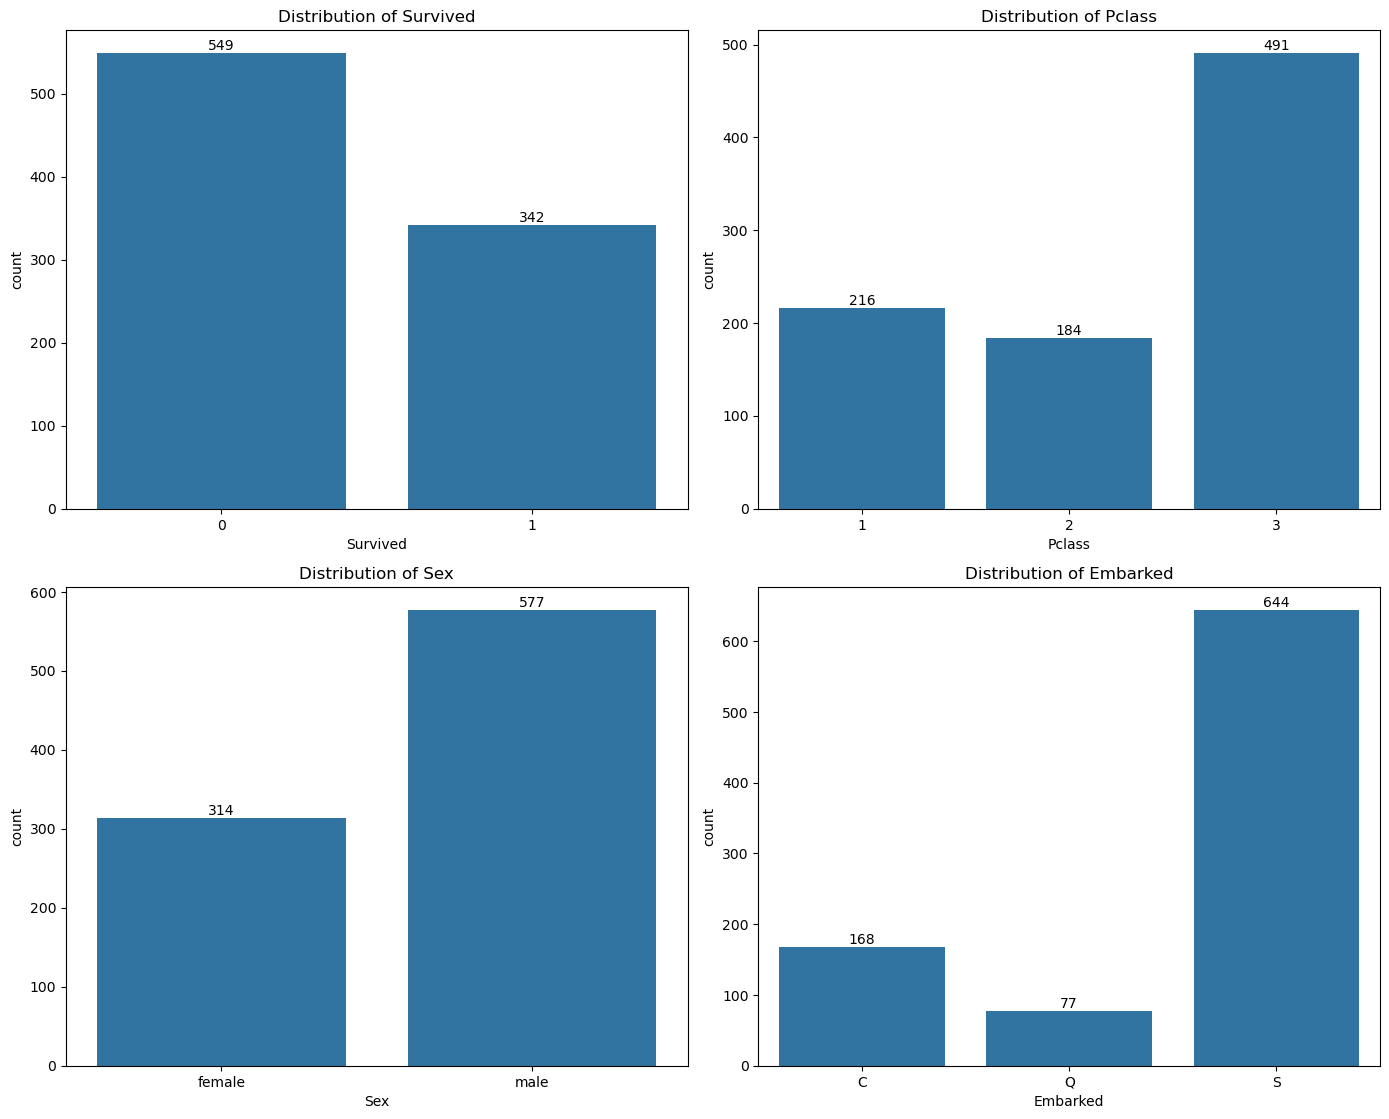

In [15]:
categorical_columns = df.select_dtypes(include=["category"]).columns
plt.figure(figsize=(14, len(categorical_columns) * 3 + 10))
for idx, feature in enumerate(categorical_columns, 1):
    # print(feature)
    plt.subplot(len(categorical_columns), 2, idx)
    sns.countplot(data=df, x=feature)
    plt.title('Distribution of ' + feature)
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

- 549 passenger did not survive from the Titanic disaster, and 342 passenger survived. The dataset is not very balance in terms of outcome.
- The majority of passenger registered third class.
- Two thirds of the passengers were male.
- Most of passengers got on board at Southampton.
- Inside the dataset, only 204 passengers have Cabin value.

### Bivariate Analysis

To check if my hypothesis is correct, I will check survivability mainly on `Age` and `Sex` first.

#### Survivability of passengers base on age and gender

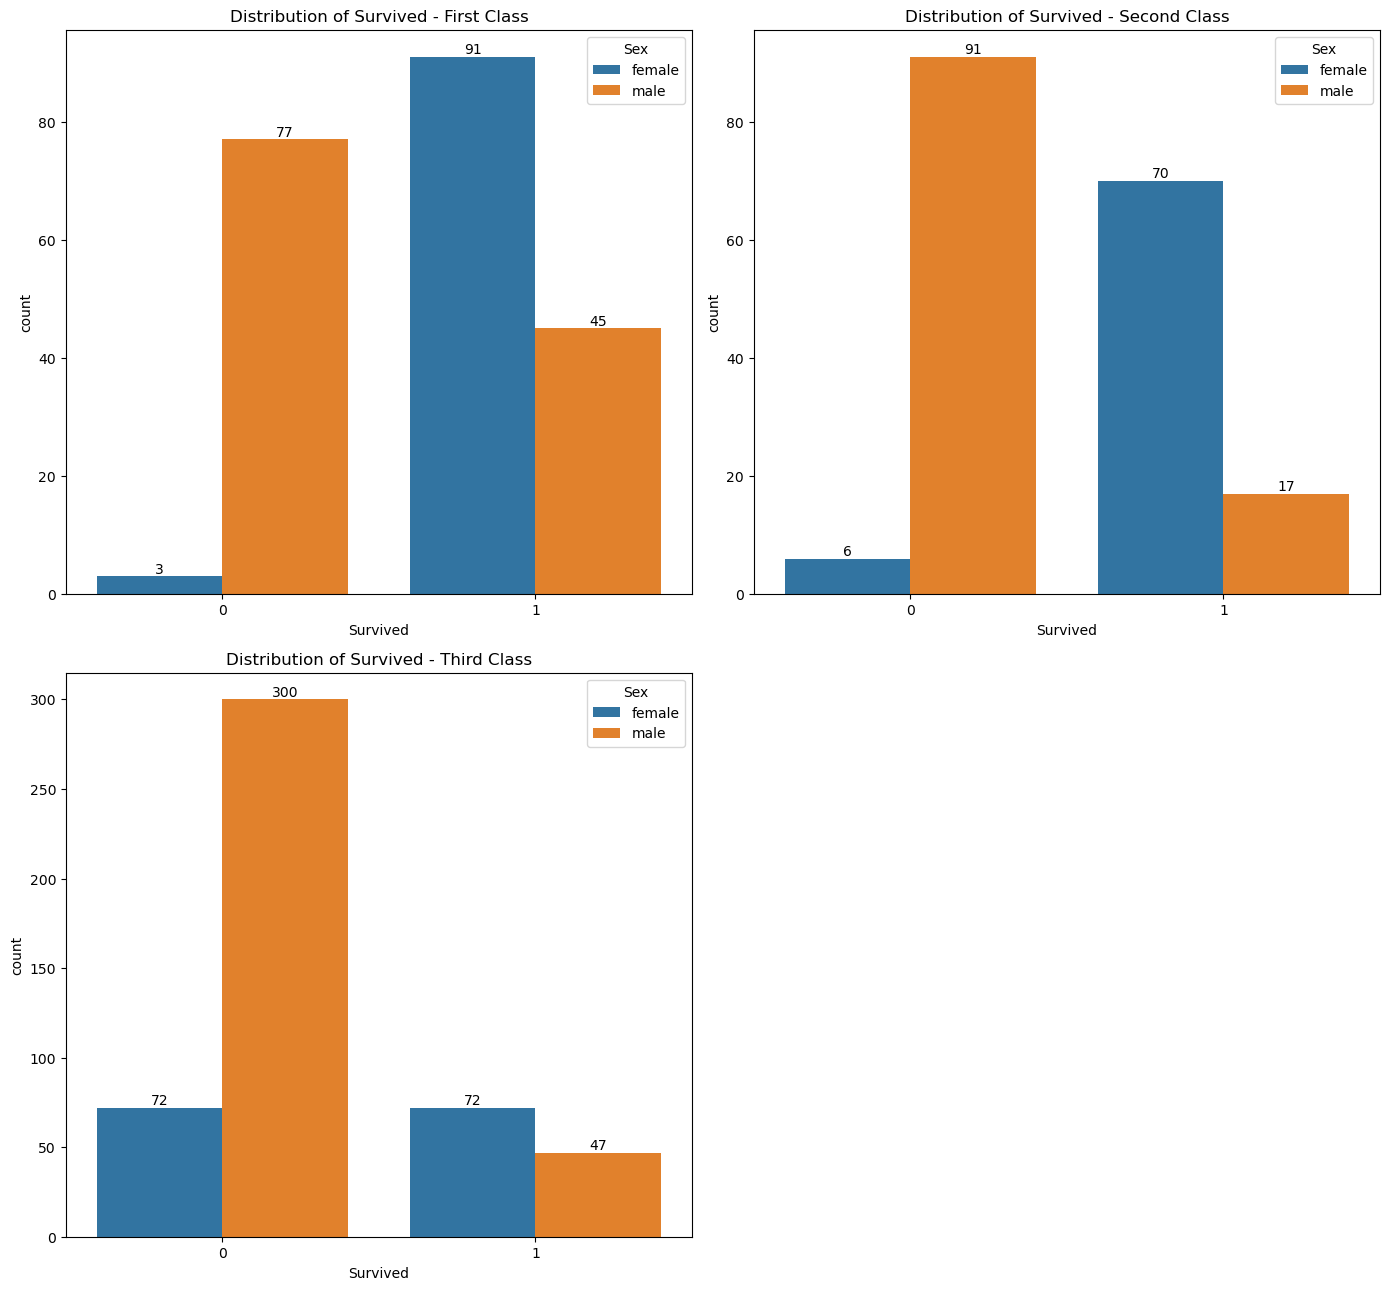

In [16]:
first_class = df['Pclass'].apply(lambda x: x == 1)
second_class = df['Pclass'].apply(lambda x: x == 2)
third_class = df['Pclass'].apply(lambda x: x == 3)

df_list = [first_class, second_class, third_class]
names = ["First Class", "Second Class", "Third Class"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Sex')
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()


#### Survivability of passengers base on Pclass

It could be true that high class passenger had higher survival probability, we will check that as well.

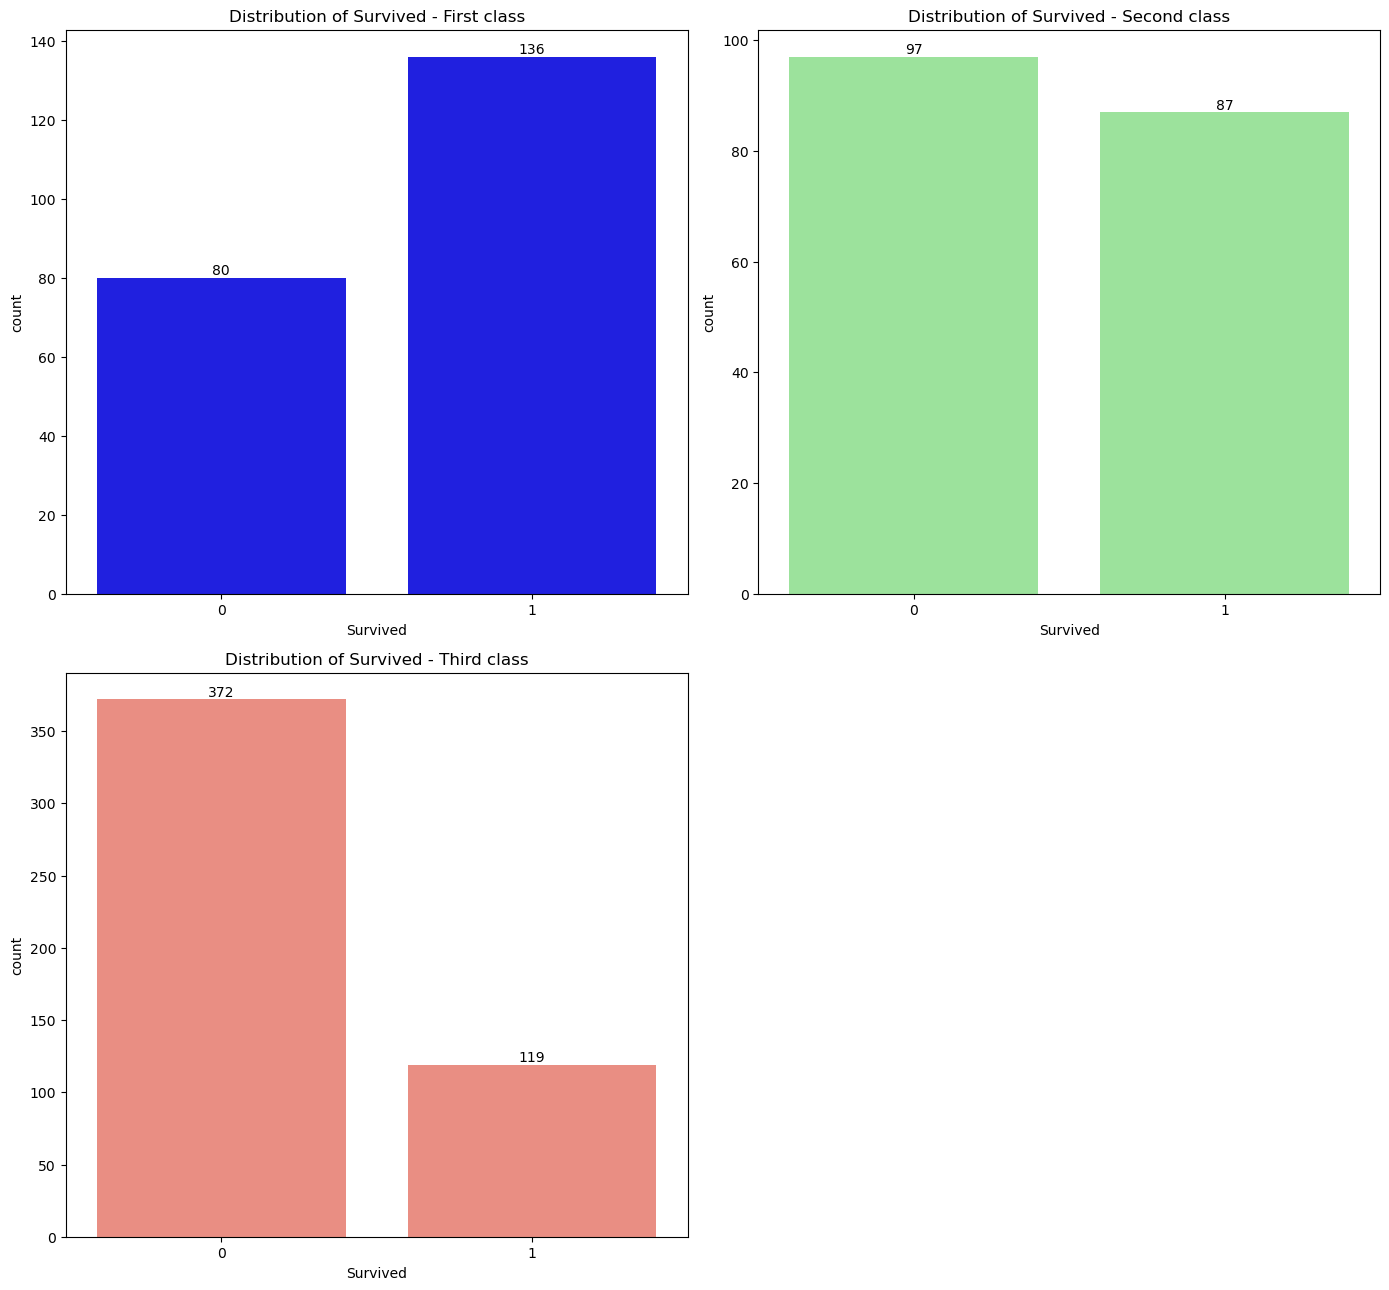

In [17]:
first_class = df["Pclass"].apply(lambda x: x == 1)
second_class = df["Pclass"].apply(lambda x: x == 2)
third_class = df["Pclass"].apply(lambda x: x == 3)

df_list = [first_class, second_class, third_class]
names = ["First class", "Second class", "Third class"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))

# each graph have specific color
colors = ['blue', 'lightgreen', 'salmon']
for idx, (feature, name, color) in enumerate(zip(df_list, names, colors), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', color=color)
    plt.title(f'Distribution of Survived - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

The percentage of survival in each class, sorted by order: First class (63%), Second class (47%), Third class (24%)

- Male always have lower percentage of survivability in all three classes
- Women's percentage of survivability is 74.2%, while male's is only 19% (109 survived out of 577)

#### Survivability of passengers base on age and Pclass

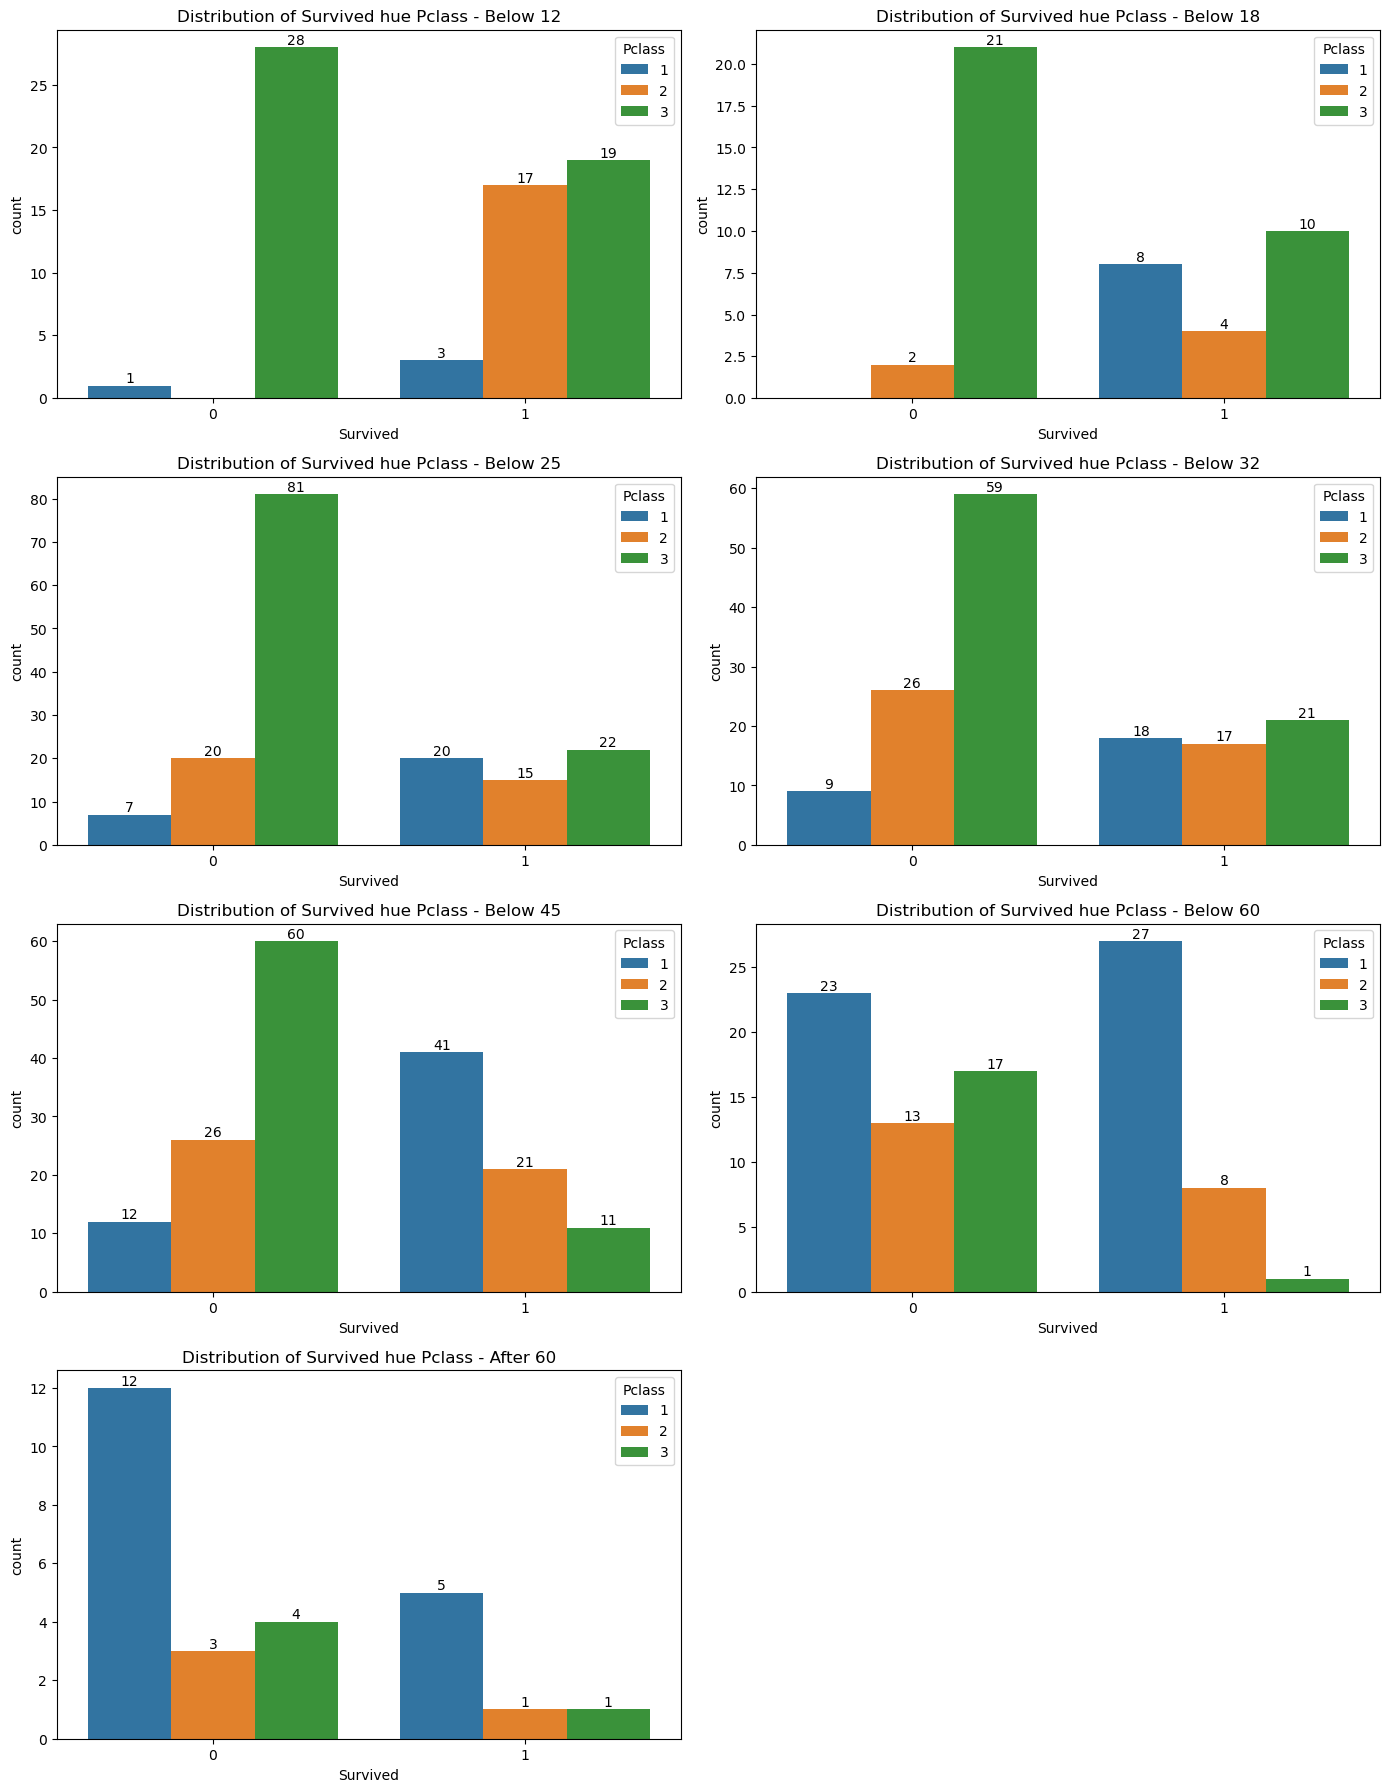

In [18]:
below_12 = df["Age"].apply(lambda x: x < 12)
below_18 = df["Age"].apply(lambda x: x < 18 and x >= 12)
below_25 = df["Age"].apply(lambda x: x < 25 and x >= 18)
below_32 = df["Age"].apply(lambda x: x < 32 and x >= 25)
below_45 = df["Age"].apply(lambda x: x < 45 and x >= 32)
below_60 = df["Age"].apply(lambda x: x < 60 and x >= 45)
after_60 = df["Age"].apply(lambda x: x >= 60)

df_list = [below_12, below_18, below_25, below_32, below_45, below_60, after_60]
names = ["Below 12", "Below 18", "Below 25", "Below 32", "Below 45", "Below 60", "After 60"]

plt.figure(figsize=(14, len(df_list) * 3 + 10))
for idx, (feature, name) in enumerate(zip(df_list, names), 1):
    plt.subplot(len(df_list), 2, idx)
    sns.countplot(data=df[feature], x='Survived', hue='Pclass')
    plt.title(f'Distribution of Survived hue Pclass - {name}')
    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container)    

plt.tight_layout()
plt.show()

#### Survivability base on size of family

We will do that later

#### Pairplot (Numeric variables)

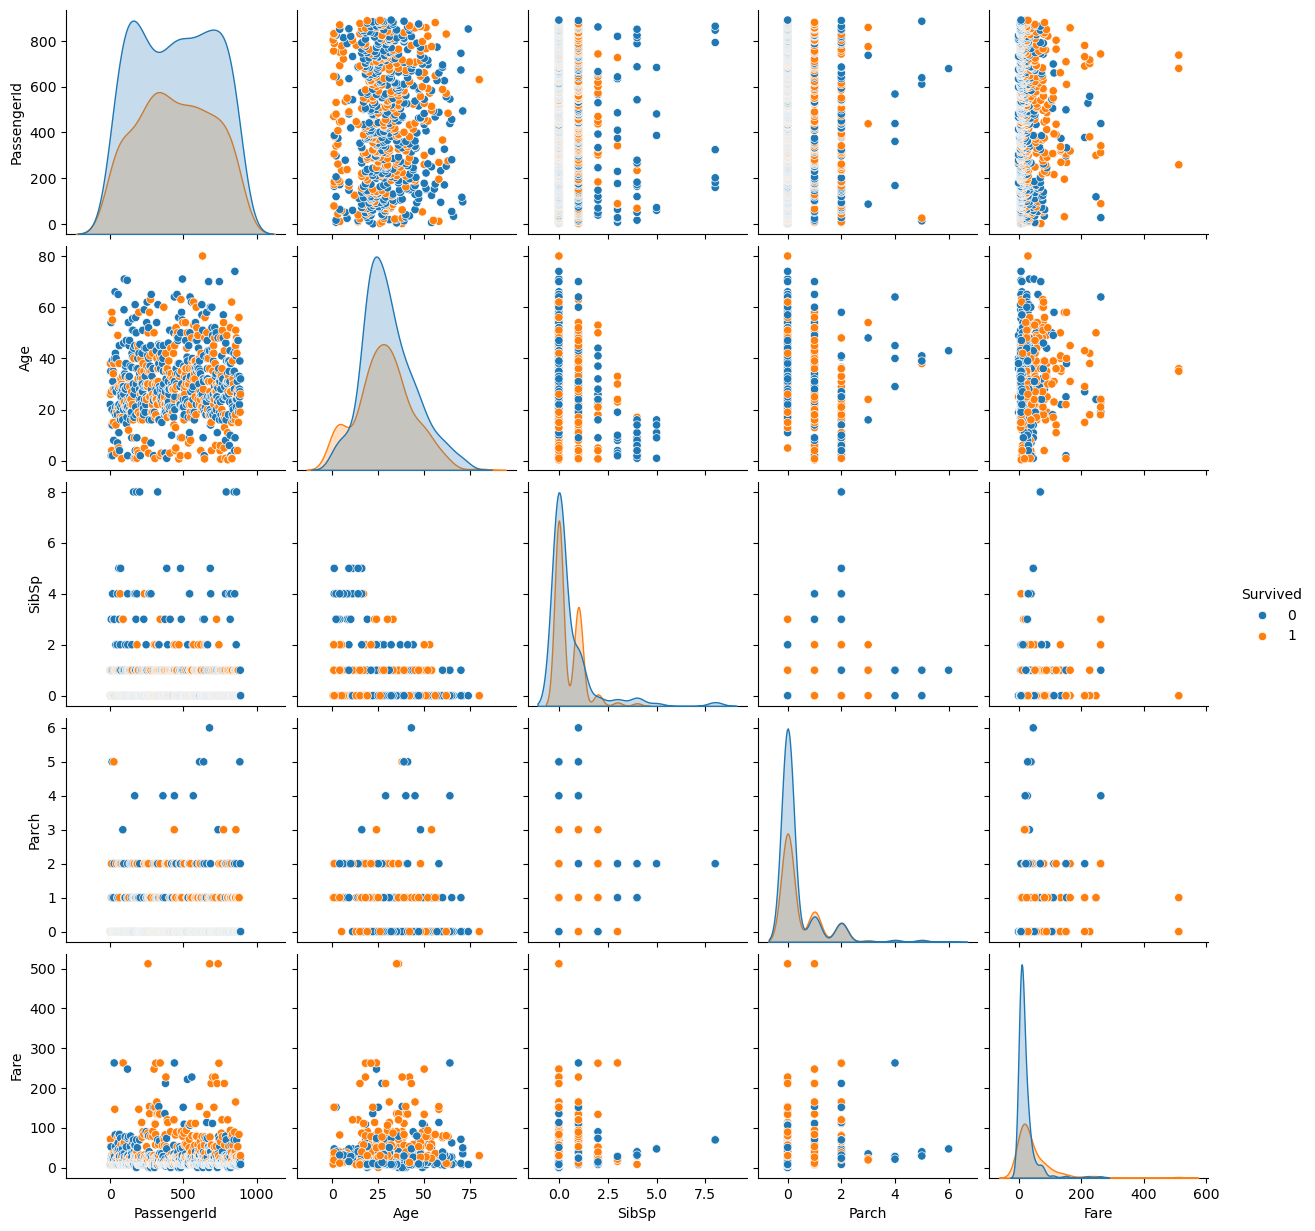

In [19]:
sns.pairplot(df, hue='Survived', diag_kind="kde")
plt.show()

#### Correlation heatmap

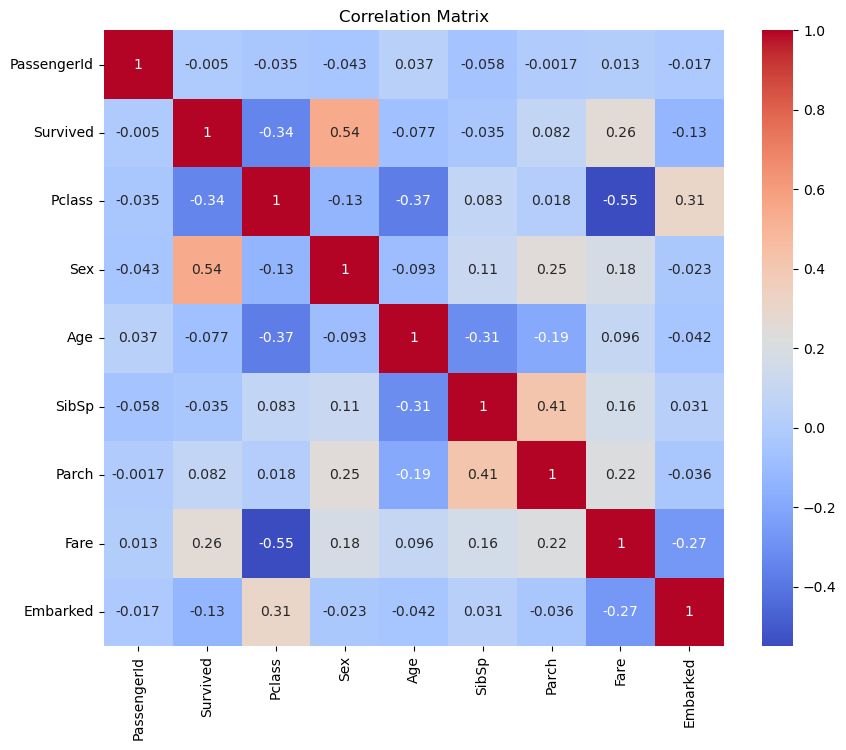

In [20]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(['Name', 'Ticket', 'Cabin'], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

There are some really standout information from this image:
- `PassengerId` did not have much impact on any other variable. We could consider remove it.
- `Sex` and `Pclass` are the two that have most impact on `Survived`.
- `Parch` and `SibSp` have high correlation.

# The end